# <b><span style='color:#F1A424'>AutoML - Regression </span> </b>

## <b> Problem overview:</b>
    

**Dataset used : Fish Weight Dataset**

**Features**:

- `Species`: Species name of fish
- `Length1`: Vertical length in cm
- `Length2`: Diagonal length in cm
- `Length3`: Cross length in cm
- `Height`: Height in cm
- `Width`: Diagonal width in cm

**Target Variable**:

- `Weight`: Weight of fish in gram

        
**Objective**:

The primary objective is typically to build a model that can accurately predict weight of fish in gram.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','fish')

In [5]:
# Fetching in teradata dataframe
fish_df = DataFrame("fish")

In [6]:
# first 5 rows
fish_df.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,850,32.8,36.0,41.6,16.8896,6.1984
Bream,290,24.0,26.3,31.2,12.48,4.3056
Bream,575,31.3,34.0,39.5,15.1285,5.5695
Bream,920,35.0,38.5,44.1,18.0369,6.3063
Bream,500,26.8,29.7,34.5,14.1795,5.2785
Bream,600,29.4,32.0,37.2,15.438,5.58
Bream,725,31.8,35.0,40.9,16.36,6.0532
Bream,680,31.8,35.0,40.6,15.4686,6.1306
Bream,620,31.5,34.5,39.7,15.5227,5.2801
Bream,950,38.0,41.0,46.5,17.6235,6.3705


In [7]:
# fish_df dataset
fish_df.shape

(159, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
fish_df_sample = fish_df.sample(frac = [0.8, 0.2])

In [9]:
fish_df_sample.head()

Species,Weight,Length1,Length2,Length3,Height,Width,sampleid
Bream,500,28.5,30.7,36.2,14.2266,4.9594,1
Bream,500,29.1,31.5,36.4,13.7592,4.368,1
Bream,340,29.5,32.0,37.3,13.9129,5.0728,1
Bream,600,29.4,32.0,37.2,14.9544,5.1708,2
Bream,700,30.4,33.0,38.5,14.938,5.1975,1
Bream,610,30.9,33.5,38.6,15.633,5.1338,1
Bream,700,30.4,33.0,38.3,14.8604,5.2854,1
Bream,475,28.4,31.0,36.2,14.2628,5.1042,1
Bream,450,27.6,30.0,35.1,14.0049,4.8438,1
Bream,450,26.8,29.7,34.7,13.6024,4.9274,1


In [10]:
# Fetching train and test data
fish_df_train= fish_df_sample[fish_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
fish_df_test = fish_df_sample[fish_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
fish_df_train.shape

(127, 7)

In [12]:
# test data shape
fish_df_test.shape

(32, 7)

In [13]:
#train dataset
fish_df_train.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,475,28.4,31.0,36.2,14.2628,5.1042
Bream,340,29.5,32.0,37.3,13.9129,5.0728
Bream,700,30.4,33.0,38.3,14.8604,5.2854
Bream,700,30.4,33.0,38.5,14.938,5.1975
Bream,650,31.0,33.5,38.7,14.4738,5.7276
Bream,575,31.3,34.0,39.5,15.1285,5.5695
Bream,610,30.9,33.5,38.6,15.633,5.1338
Bream,500,28.7,31.0,36.2,14.3714,4.8146
Bream,500,28.5,30.7,36.2,14.2266,4.9594
Bream,500,26.8,29.7,34.5,14.1795,5.2785


In [14]:
# test dataset
fish_df_test.head()

Species,Weight,Length1,Length2,Length3,Height,Width
Bream,1000,33.5,37.0,42.6,18.957,6.603
Bream,430,26.5,29.0,34.0,12.444,5.134
Bream,363,26.3,29.0,33.5,12.73,4.4555
Bream,700,31.9,35.0,40.5,16.2405,5.589
Parkki,273,23.0,25.0,28.0,11.088,4.144
Perch,130,19.3,21.3,22.8,6.384,3.534
Parkki,170,19.0,20.7,23.2,9.396,3.4104
Bream,600,29.4,32.0,37.2,14.9544,5.1708
Bream,925,36.2,39.5,45.3,18.7542,6.7497
Bream,850,32.8,36.0,41.6,16.8896,6.1984


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Excluded 'glm' from model training.
# Keeping early stopping timer threshold to 300 sec
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Regression", 
             exclude=['glm'],
             max_runtime_secs=300,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 127
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
Length2,FLOAT,127,0,None,0,127,0,0.0,100.0
Species,VARCHAR(20) CHARACTER SET LATIN,127,0,0,None,None,None,0.0,100.0
Length3,FLOAT,127,0,None,0,127,0,0.0,100.0
Width,FLOAT,127,0,None,0,127,0,0.0,100.0
Weight,INTEGER,127,0,None,1,126,0,0.0,100.0
Length1,FLOAT,127,0,None,0,127,0,0.0,100.0
Height,FLOAT,127,0,None,0,127,0,0.0,100.0



Statistics of Data:


func,Weight,Length1,Length2,Length3,Height,Width
50%,272,25,27,30,7.616,4.239
count,127,127,127,127,127,127
mean,394.142,26.29,28.447,31.245,8.868,4.364
min,0,7.5,8.4,8.8,1.728,1.048
max,1650,59,63.4,68,18.635,8.142
75%,635,32.7,35.5,39.6,12.366,5.47
25%,120,19,21,22.95,5.945,3.338
std,362.288,10.174,10.895,11.78,4.245,1.679



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
Species                   7         

No Futile columns found.

Target Column Distribution:


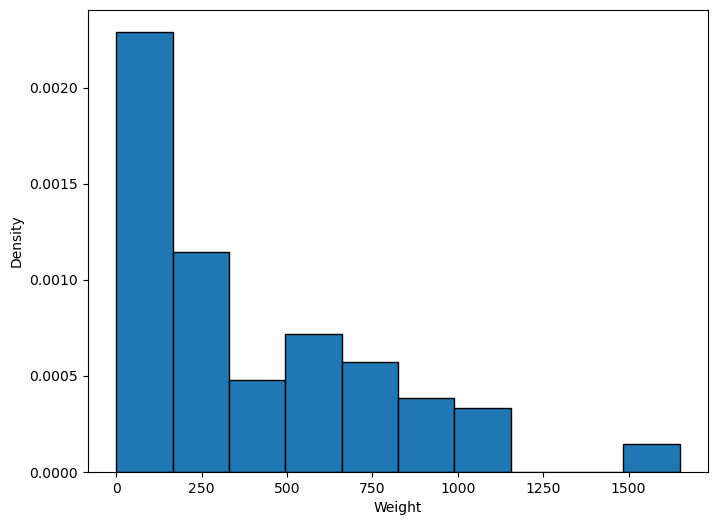

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    Length2           2.362205
1    Length3           0.787402
2    Length1           2.362205
3     Weight           2.362205


Analysis complete. No action taken.                                                     


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                   


No Missing Values Detected.                                                              


No imputation is Required.                                                               


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711980441248154"'8


['Species']


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,955,35.0,38.5,44.0,18.084,6.292,34
1,0,0,0,0,0,0,242,23.2,25.4,30.0,11.52,4.02,50
1,0,0,0,0,0,0,700,30.4,33.0,38.5,14.938,5.1975,58
1,0,0,0,0,0,0,620,31.5,34.5,39.7,15.5227,5.2801,66
1,0,0,0,0,0,0,700,30.4,33.0,38.3,14.8604,5.2854,82
1,0,0,0,0,0,0,500,28.5,30.7,36.2,14.2266,4.9594,90
0,1,0,0,0,0,0,120,17.5,19.0,21.3,8.3922,2.9181,8
0,0,0,0,1,0,0,145,20.5,22.0,24.3,6.6339,3.5478,12
0,0,0,0,0,1,0,8,10.8,11.3,12.6,1.9782,1.2852,15
0,1,0,0,0,0,0,90,16.3,17.7,19.8,7.4052,2.673,16


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
0,0,0,1,0,0,0,567,43.2,46.0,48.7,7.792,4.87,53
0,0,0,0,1,0,0,140,21.0,22.5,25.0,6.55,3.325,60
0,0,0,0,1,0,0,78,17.5,18.8,21.2,5.5756,2.9044,68
0,0,0,0,1,0,0,120,18.6,20.0,22.2,6.216,3.5742,100
0,0,1,0,0,0,0,180,23.0,25.0,26.5,6.4395,3.6835,136
0,0,1,0,0,0,0,225,22.0,24.0,25.5,7.293,3.723,176
1,0,0,0,0,0,0,575,31.3,34.0,39.5,15.1285,5.5695,26
1,0,0,0,0,0,0,685,31.4,34.0,39.2,15.9936,5.3704,122
1,0,0,0,0,0,0,600,29.4,32.0,37.2,15.438,5.58,186
1,0,0,0,0,0,0,725,31.8,35.0,40.9,16.36,6.0532,202


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0     Weight           2.362205
1    Length3           0.787402
2    Length2           2.362205
3    Length1           2.362205


['Length1', 'Length3', 'Weight', 'Length2']
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711973975035593"'8


result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711974537042321"'8
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711974007997795"'


['Species_3', 'Species_4', 'Species_1', 'Species_0', 'Species_2', 'Species_6', 'Species_5', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Species_3,id,Species_4,Species_1,Species_0,Species_2,Species_6,Species_5,Weight,Length1,Length2,Length3,Height,Width
1,69,0,0,0,0,0,0,950,2.5186293011147796,2.476082176847053,2.332330585530442,0.023777186442545582,1.0921410810204122
1,93,0,0,0,0,0,0,540,1.621638294920915,1.5908846155321978,1.4641366239014408,-0.23938963727601814,0.48637277834290166
0,32,0,1,0,0,0,0,55,-1.2881130178543068,-1.2885511298942842,-1.2711411261770234,-0.4560025683932536,-1.1438395193100652
1,101,0,0,0,0,0,0,300,1.0418758153078063,1.0109275926017753,0.9040114873666018,-0.5850470966699147,-0.15905892510516026
1,117,0,0,0,0,0,0,510,1.6106993802112335,1.5400111924681257,1.4361303670746992,-0.4611957393577052,0.096368723258859
0,40,0,1,0,0,0,0,300,-0.139526973337772,-0.13881176864625425,-0.10421375839610848,0.5873631802646724,-0.03448560479647865
0,36,1,0,0,0,0,0,110,-0.6755337941121548,-0.6678953685126042,-0.6550034759887001,-0.6129055737992172,-0.5220197523910995
0,31,0,0,0,0,0,1,9,-1.528769141467295,-1.5836169836659024,-1.5885453702134325,-1.5254726564324894,-1.8188152221590657
0,23,0,0,0,0,0,1,12,-1.4412578237898448,-1.4615207683121294,-1.5231974376177009,-1.510908696972183,-1.7665316484160662
1,45,0,0,0,0,0,0,300,0.7027694593076868,0.6751630003788996,0.7173031085216554,-0.7190539883126074,-0.07868528893961477


Species_3,id,Species_4,Species_1,Species_0,Species_2,Species_6,Species_5,Weight,Length1,Length2,Length3,Height,Width
1,125,0,0,0,0,0,0,200,0.516807909243105,0.5021933619610541,0.43724054025423575,-0.7513208905717331,-0.5337094056973765
1,37,0,0,0,0,0,0,456,1.6106993802112335,1.5400111924681257,1.4361303670746992,-0.35617828207657337,0.016983764238620788
0,226,0,0,1,0,0,0,500,0.41835767685597364,0.42079588505853904,0.586607243330193,1.1392703096067434,0.0434454172453672
1,13,0,0,0,0,0,0,300,0.8121586064045,0.7769098465070439,0.8106572979441286,-0.6662913713137794,0.05298324382362292
0,68,1,0,0,0,0,0,78,-0.8505564294670555,-0.8713890607688927,-0.8323764358913994,-0.7495667528237406,-0.8077474473848218
0,100,1,0,0,0,0,0,120,-0.7302283676605612,-0.7492928454151196,-0.7390222464689262,-0.6017575667955277,-0.41820865213386504
0,56,0,1,0,0,0,0,140,-0.6864727088218362,-0.6780700531254188,-0.645668057046453,-0.06591464630349364,-0.5809332787555695
0,210,0,0,1,0,0,0,340,0.4621133356946986,0.47166930812261115,0.6706260138104188,1.1747454374839084,0.45333933019382083
0,186,0,0,1,0,0,0,600,0.45117442098501714,0.47166930812261115,0.661290594868172,1.5267501058343569,0.7483140643701203
1,53,0,0,0,0,0,0,567,1.960744650921035,1.8961251539166304,1.7348637732266137,-0.23800479168549768,0.33539596250660975


['Species_4', 'Species_2', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


['r_Length1', 'r_Length2', 'r_Length3', 'r_Height', 'r_Width']


r_Species_4,Weight,r_Species_2,id,r_Length1,r_Length2,r_Length3,r_Height,r_Width
0,950,0,69,2.5186293011147796,2.476082176847053,2.332330585530442,0.023777186442545582,1.0921410810204122
0,540,0,93,1.621638294920915,1.5908846155321978,1.4641366239014408,-0.23938963727601814,0.48637277834290166
0,55,0,32,-1.2881130178543068,-1.2885511298942842,-1.2711411261770234,-0.4560025683932536,-1.1438395193100652
0,300,0,101,1.0418758153078063,1.0109275926017753,0.9040114873666018,-0.5850470966699147,-0.15905892510516026
0,510,0,117,1.6106993802112335,1.5400111924681257,1.4361303670746992,-0.4611957393577052,0.096368723258859
0,300,0,40,-0.139526973337772,-0.13881176864625425,-0.10421375839610848,0.5873631802646724,-0.03448560479647865
1,110,0,36,-0.6755337941121548,-0.6678953685126042,-0.6550034759887001,-0.6129055737992172,-0.5220197523910995
0,9,0,31,-1.528769141467295,-1.5836169836659024,-1.5885453702134325,-1.5254726564324894,-1.8188152221590657
0,12,0,23,-1.4412578237898448,-1.4615207683121294,-1.5231974376177009,-1.510908696972183,-1.7665316484160662
0,300,0,45,0.7027694593076868,0.6751630003788996,0.7173031085216554,-0.7190539883126074,-0.07868528893961477


r_Species_4,Weight,r_Species_2,id,r_Length1,r_Length2,r_Length3,r_Height,r_Width
0,200,0,125,0.516807909243105,0.5021933619610541,0.43724054025423575,-0.7513208905717331,-0.5337094056973765
0,456,0,37,1.6106993802112335,1.5400111924681257,1.4361303670746992,-0.35617828207657337,0.016983764238620788
0,500,0,226,0.41835767685597364,0.42079588505853904,0.586607243330193,1.1392703096067434,0.0434454172453672
0,300,0,13,0.8121586064045,0.7769098465070439,0.8106572979441286,-0.6662913713137794,0.05298324382362292
1,78,0,68,-0.8505564294670555,-0.8713890607688927,-0.8323764358913994,-0.7495667528237406,-0.8077474473848218
1,120,0,100,-0.7302283676605612,-0.7492928454151196,-0.7390222464689262,-0.6017575667955277,-0.41820865213386504
0,140,0,56,-0.6864727088218362,-0.6780700531254188,-0.645668057046453,-0.06591464630349364,-0.5809332787555695
0,340,0,210,0.4621133356946986,0.47166930812261115,0.6706260138104188,1.1747454374839084,0.45333933019382083
0,600,0,186,0.45117442098501714,0.47166930812261115,0.661290594868172,1.5267501058343569,0.7483140643701203
0,567,0,53,1.960744650921035,1.8961251539166304,1.7348637732266137,-0.23800479168549768,0.33539596250660975


['Length1', 'Length2', 'Length3', 'Height', 'Width']


Species_3,id,Species_4,Species_1,Species_0,Species_2,Species_6,Species_5,Weight,Length1,Length2,Length3,Height,Width
1,21,0,0,0,0,0,0,500,1.82947767440486,1.7943783077884863,1.669515840630882,-0.4300367135709957,0.3505169070818926
0,28,1,0,0,0,0,0,0,-0.6864727088218349,-0.6984194223510476,-0.6830097328154426,-0.5419322372850456,-0.5476672006899465
1,29,0,0,0,0,0,0,345,1.173142791823983,1.1330238079555488,1.0160365146735697,-0.5602121990799152,-0.1839503261752429
0,31,0,0,0,0,0,1,9,-1.5287691414672935,-1.5836169836659024,-1.5885453702134327,-1.525472656432489,-1.8188152221590663
0,36,1,0,0,0,0,0,110,-0.6755337941121534,-0.6678953685126042,-0.6550034759887006,-0.6129055737992171,-0.5220197523911
0,39,0,0,0,0,0,1,7,-1.660036117983469,-1.7057131990196757,-1.7285766543471426,-1.6375297454654332,-1.8289927810078146
0,34,0,0,1,0,0,0,955,1.0637536447271703,1.1330238079555488,1.2960990829409893,2.1374670112538614,1.1623953158163443
0,50,0,0,1,0,0,0,242,-0.22703829101522116,-0.19985987632314092,-0.010859568973635618,0.6224459352245227,-0.15894261014688962
0,58,0,0,1,0,0,0,700,0.560563568081831,0.5734161542507554,0.7826510411173866,1.4113463066243217,0.5258617066760453
0,66,0,0,1,0,0,0,620,0.6808916298883253,0.7260364234429718,0.8946760684243548,1.5462995094205365,0.5738997844421383


Species_3,id,Species_4,Species_1,Species_0,Species_2,Species_6,Species_5,Weight,Length1,Length2,Length3,Height,Width
0,186,0,0,1,0,0,0,600,0.45117442098501825,0.47166930812261115,0.6612905948681718,1.5267501058343567,0.7483140643701197
0,210,0,0,1,0,0,0,340,0.4621133356946997,0.47166930812261115,0.6706260138104185,1.1747454374839081,0.45333933019382033
0,226,0,0,1,0,0,0,500,0.4183576768559747,0.42079588505853904,0.5866072433301928,1.1392703096067431,0.043445417245366685
1,13,0,0,0,0,0,0,300,0.812158606404501,0.7769098465070439,0.8106572979441283,-0.6662913713137792,0.052983243823622406
1,53,0,0,0,0,0,0,567,1.9607446509210356,1.8961251539166304,1.7348637732266137,-0.23800479168549762,0.33539596250660925
0,56,0,1,0,0,0,0,140,-0.6864727088218349,-0.6780700531254188,-0.6456680570464535,-0.06591464630349363,-0.58093327875557
0,60,1,0,0,0,0,0,140,-0.46769441462820927,-0.4949257300947591,-0.47763051608600166,-0.5246678289232244,-0.563137090140044
0,68,1,0,0,0,0,0,78,-0.8505564294670541,-0.8713890607688927,-0.8323764358913999,-0.7495667528237405,-0.8077474473848224
0,100,1,0,0,0,0,0,120,-0.7302283676605599,-0.7492928454151196,-0.7390222464689267,-0.6017575667955276,-0.41820865213386554
1,125,0,0,0,0,0,0,200,0.516807909243106,0.5021933619610541,0.43724054025423553,-0.751320890571733,-0.533709405697377


['col_0', 'col_1', 'col_2', 'col_3']


response_column : Weight                                                                                                                              
name : svm
model_type : regression
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
tolerance : (0.001, 0.01)
learning_rate : ('Invtime', 'Adaptive', 'constant')
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
nesterov : True
intercept : True
iter_num_no_change : (5, 10, 50)
local_sgd_iterations  : (10, 20)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for svm : 15552
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : Weight
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
Total number of models for decision_forest : 108
------

SVM_3                                                                                                                                                                                                   
SVM_1                                                                                     
SVM_2                                                                                     


DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_1                                                                          
DECISIONFOREST_2                                                                          


KNN_9                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,knn,pca,40.083444,3951.139606,0.070309,62.858091,0.265159,0.953266,0.944365
1,2,knn,lasso,41.937987,3980.478816,0.098882,63.091036,0.314455,0.952919,0.909460
2,3,knn,rfe,46.434525,4125.419718,0.088553,64.229430,0.297579,0.951205,0.932229
3,4,xgboost,pca,62.147035,9307.695216,0.115801,96.476397,0.340295,0.889910,0.868940
4,5,decision_forest,pca,79.038462,11850.090144,0.171308,108.858119,0.413893,0.859839,0.833141
5,6,xgboost,rfe,87.303538,15308.549703,0.201008,123.727724,0.448339,0.818932,0.748517
6,7,decision_forest,rfe,98.502289,19106.781825,0.242958,138.227283,0.492907,0.774007,0.686121
7,8,xgboost,lasso,122.991387,20330.439663,0.618085,142.584851,0.786184,0.759534,0.537566
8,9,decision_forest,lasso,151.480769,30675.338675,0.707974,175.143766,0.841412,0.637176,0.302261
9,10,svm,lasso,352.038462,206694.961538,8.021886,454.637176,2.832293,-1.444762,-3.701466


In [16]:
# Fitting train data
aml.fit(fish_df_train, fish_df_train.Weight)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,knn,pca,40.083444,3951.139606,0.070309,62.858091,0.265159,0.953266,0.944365
1,2,knn,lasso,41.937987,3980.478816,0.098882,63.091036,0.314455,0.952919,0.909460
2,3,knn,rfe,46.434525,4125.419718,0.088553,64.229430,0.297579,0.951205,0.932229
3,4,xgboost,pca,62.147035,9307.695216,0.115801,96.476397,0.340295,0.889910,0.868940
4,5,decision_forest,pca,79.038462,11850.090144,0.171308,108.858119,0.413893,0.859839,0.833141
5,6,xgboost,rfe,87.303538,15308.549703,0.201008,123.727724,0.448339,0.818932,0.748517
6,7,decision_forest,rfe,98.502289,19106.781825,0.242958,138.227283,0.492907,0.774007,0.686121
7,8,xgboost,lasso,122.991387,20330.439663,0.618085,142.584851,0.786184,0.759534,0.537566
8,9,decision_forest,lasso,151.480769,30675.338675,0.707974,175.143766,0.841412,0.637176,0.302261
9,10,svm,lasso,352.038462,206694.961538,8.021886,454.637176,2.832293,-1.444762,-3.701466


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,knn,pca,40.083444,3951.139606,0.070309,62.858091,0.265159,0.953266,0.944365


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [19]:
# Generating prediction and metrics on default test data
prediction = aml.predict()

knn pca

 Prediction : 
    id  prediction  Weight
0  208  125.629707     125
1  125  310.437079     200
2   13  309.399668     300
3   68   88.394725      78
4   56  142.789932     140
5   53  512.174804     567
6  122  644.662224     685
7  186  686.645431     600
8  336  991.261123    1100
9  226  484.016211     500

 Performance Metrics : 
         MAE          MSE      MSLE    MAPE      MPE       RMSE     RMSLE          ME        R2        EV       MPD       MGD
0  40.083444  3951.139606  0.070309  20.571 -12.3774  62.858091  0.265159  213.875834  0.953266  0.953641  9.316125  0.063717


In [20]:
# Printing prediction
prediction.head()

id,prediction,Weight
37,513.5102553141226,456
56,142.789931792444,140
60,144.3036253394576,140
68,88.39472514508203,78
122,644.6622237362664,685
125,310.4370786429752,200
100,119.49081700187241,120
53,512.1748042840138,567
26,646.2490850171379,575
13,309.39966781932776,300


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(fish_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711973729777406"'

Updated dataset after performing categorical encoding :


Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Weight,Length1,Length2,Length3,Height,Width,id
1,0,0,0,0,0,0,925,36.2,39.5,45.3,18.7542,6.7497,50
1,0,0,0,0,0,0,850,32.8,36.0,41.6,16.8896,6.1984,34
1,0,0,0,0,0,0,600,29.4,32.0,37.2,14.9544,5.1708,18
1,0,0,0,0,0,0,430,26.5,29.0,34.0,12.444,5.134,10
0,0,0,1,0,0,0,1250,52.0,56.0,59.7,10.6863,6.9849,21
0,0,0,0,0,0,1,800,33.7,36.4,39.6,11.7612,6.5736,29
0,0,0,0,0,0,1,540,28.5,31.0,34.0,10.744,6.562,37
0,0,0,0,1,0,0,160,20.5,22.5,25.3,7.0334,3.8203,12
0,0,0,0,1,0,0,161,22.0,23.4,26.7,6.9153,3.6312,20
0,0,0,0,1,0,0,290,24.0,26.0,29.2,8.8768,4.4968,28


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USER"."ml__td_sqlmr_persist_out__1711982173086705"'

Updated dataset after performing Lasso feature selection:


id,Species_3,Species_4,Species_1,Species_0,Species_2,Species_6,Species_5,Length1,Length2,Length3,Height,Width,Weight
50,0,0,0,1,0,0,0,36.2,39.5,45.3,18.7542,6.7497,925
18,0,0,0,1,0,0,0,29.4,32.0,37.2,14.9544,5.1708,600
10,0,0,0,1,0,0,0,26.5,29.0,34.0,12.444,5.134,430
29,0,0,0,0,0,1,0,33.7,36.4,39.6,11.7612,6.5736,800
12,0,1,0,0,0,0,0,20.5,22.5,25.3,7.0334,3.8203,160
20,0,1,0,0,0,0,0,22.0,23.4,26.7,6.9153,3.6312,161
28,0,1,0,0,0,0,0,24.0,26.0,29.2,8.8768,4.4968,290
36,0,1,0,0,0,0,0,18.2,19.8,22.2,5.6166,3.1746,87
37,0,0,0,0,0,1,0,28.5,31.0,34.0,10.744,6.562,540
34,0,0,0,1,0,0,0,32.8,36.0,41.6,16.8896,6.1984,850



Updated dataset after performing scaling on Lasso selected features :


Species_3,id,Species_4,Species_1,Species_0,Species_2,Species_6,Species_5,Weight,Length1,Length2,Length3,Height,Width
0,50,0,0,1,0,0,0,925,1.195020621243345,1.234770654083693,1.4174595291902043,2.292154263714993,1.4285820978204697
0,18,0,0,1,0,0,0,600,0.45117442098501714,0.47166930812261115,0.661290594868172,1.415131551238411,0.5103336597468123
0,10,0,0,1,0,0,0,430,0.13394589440426008,0.16642876973817847,0.3625571887162575,0.8357121561646678,0.48893170742487296
0,29,0,0,0,0,1,0,800,0.9215477535013128,0.9193554310864457,0.8853406494821074,0.6781167279634439,1.326166777062492
0,12,1,0,0,0,0,0,160,-0.5223889881766169,-0.4949257300947591,-0.4496242592592592,-0.41309543584696257,-0.27508309598089314
0,20,1,0,0,0,0,0,161,-0.3583052675313977,-0.4033535685794294,-0.3189283940677969,-0.44035381322037287,-0.38505888902651253
0,28,1,0,0,0,0,0,290,-0.139526973337772,-0.13881176864625425,-0.0855429205116139,0.012375291080594052,0.11835225037215617
0,36,1,0,0,0,0,0,87,-0.7739840264992865,-0.7696422146407484,-0.7390222464689262,-0.7401036412885177,-0.650605938760145
0,37,0,0,0,0,1,0,540,0.3527241885978858,0.36992246199446693,0.3625571887162575,0.44333923885054866,1.3194205094827505
0,34,0,0,1,0,0,0,850,0.8230975211141807,0.8786566926351881,1.0720490283270538,1.8617904157009306,1.1079599153453246



Updated dataset after performing RFE feature selection:


id,Species_4,Species_2,Length1,Length2,Length3,Height,Width,Weight
50,0,0,36.2,39.5,45.3,18.7542,6.7497,925
18,0,0,29.4,32.0,37.2,14.9544,5.1708,600
10,0,0,26.5,29.0,34.0,12.444,5.134,430
29,0,0,33.7,36.4,39.6,11.7612,6.5736,800
12,1,0,20.5,22.5,25.3,7.0334,3.8203,160
20,1,0,22.0,23.4,26.7,6.9153,3.6312,161
28,1,0,24.0,26.0,29.2,8.8768,4.4968,290
36,1,0,18.2,19.8,22.2,5.6166,3.1746,87
37,0,0,28.5,31.0,34.0,10.744,6.562,540
34,0,0,32.8,36.0,41.6,16.8896,6.1984,850



Updated dataset after performing scaling on RFE selected features :


r_Species_4,Weight,r_Species_2,id,r_Length1,r_Length2,r_Length3,r_Height,r_Width
0,925,0,50,1.195020621243345,1.234770654083693,1.4174595291902043,2.292154263714993,1.4285820978204697
0,600,0,18,0.45117442098501714,0.47166930812261115,0.661290594868172,1.415131551238411,0.5103336597468123
0,430,0,10,0.13394589440426008,0.16642876973817847,0.3625571887162575,0.8357121561646678,0.48893170742487296
0,800,0,29,0.9215477535013128,0.9193554310864457,0.8853406494821074,0.6781167279634439,1.326166777062492
1,160,0,12,-0.5223889881766169,-0.4949257300947591,-0.4496242592592592,-0.41309543584696257,-0.27508309598089314
1,161,0,20,-0.3583052675313977,-0.4033535685794294,-0.3189283940677969,-0.44035381322037287,-0.38505888902651253
1,290,0,28,-0.139526973337772,-0.13881176864625425,-0.0855429205116139,0.012375291080594052,0.11835225037215617
1,87,0,36,-0.7739840264992865,-0.7696422146407484,-0.7390222464689262,-0.7401036412885177,-0.650605938760145
0,540,0,37,0.3527241885978858,0.36992246199446693,0.3625571887162575,0.44333923885054866,1.3194205094827505
0,850,0,34,0.8230975211141807,0.8786566926351881,1.0720490283270538,1.8617904157009306,1.1079599153453246



Updated dataset after performing scaling for PCA feature selection :


Species_3,id,Species_4,Species_1,Species_0,Species_2,Species_6,Species_5,Weight,Length1,Length2,Length3,Height,Width
0,50,0,0,1,0,0,0,925,1.1950206212433458,1.234770654083693,1.4174595291902041,2.2921542637149925,1.4285820978204693
0,18,0,0,1,0,0,0,600,0.45117442098501825,0.47166930812261115,0.6612905948681718,1.4151315512384106,0.5103336597468119
0,10,0,0,1,0,0,0,430,0.13394589440426122,0.16642876973817847,0.3625571887162572,0.8357121561646675,0.48893170742487246
0,29,0,0,0,0,1,0,800,0.9215477535013138,0.9193554310864457,0.8853406494821073,0.6781167279634438,1.3261667770624916
0,12,1,0,0,0,0,0,160,-0.5223889881766157,-0.4949257300947591,-0.44962425925925964,-0.4130954358469625,-0.27508309598089364
0,20,1,0,0,0,0,0,161,-0.35830526753139647,-0.4033535685794294,-0.31892839406779727,-0.44035381322037276,-0.3850588890265131
0,28,1,0,0,0,0,0,290,-0.1395269733377708,-0.13881176864625425,-0.08554292051161425,0.01237529108059405,0.11835225037215566
0,36,1,0,0,0,0,0,87,-0.7739840264992852,-0.7696422146407484,-0.7390222464689267,-0.7401036412885176,-0.6506059387601455
0,37,0,0,0,0,1,0,540,0.35272418859788685,0.36992246199446693,0.3625571887162572,0.4433392388505486,1.31942050948275
0,34,0,0,1,0,0,0,850,0.8230975211141817,0.8786566926351881,1.0720490283270536,1.8617904157009302,1.1079599153453241



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,Weight
0,13,-3.035309,1.733344,1.426313,-0.215470,770
1,50,-3.372208,-1.255411,0.067749,-0.078246,925
2,21,-4.821682,1.774335,1.369266,-0.124159,1250
3,34,-2.568914,-1.187448,0.065983,-0.089850,850
4,18,-1.582032,-1.135901,0.166597,-0.166424,600
5,10,-0.923540,-0.919550,0.080671,-0.104586,430
6,29,-2.097998,0.127473,0.007929,0.267351,800
7,37,-1.252250,-0.057918,-0.267247,0.360472,540
8,12,0.999077,-0.040508,0.143869,0.929393,160
9,20,0.882274,0.058617,0.270571,0.881823,161


Data Transformation completed.
knn pca

 Prediction : 
   id  prediction  Weight
0  10  426.290532     430
1  21  675.675593    1250
2  45  278.887748     306
3  37  521.401925     540
4  28  233.277699     290
5  31    7.816356       7
6  13  514.979143     770
7  34  708.515756     850
8  48  129.955482     110
9  50  963.531011     925

 Performance Metrics : 
         MAE           MSE      MSLE       MAPE       MPE        RMSE     RMSLE          ME        R2        EV        MPD       MGD
0  55.103499  14483.978211  0.028266  11.075249  3.454512  120.349401  0.168124  574.324407  0.874926  0.884591  19.214401  0.032787


In [22]:
# Printing prediction
prediction.head()

id,prediction,Weight
12,157.04635649050493,160
15,8.792258959629503,10
16,143.2672926949162,170
18,649.3529104531358,600
21,675.675592636394,1250
23,10.216473616576502,13
20,174.3643545600393,161
13,514.9791430023741,770
10,426.29053225756934,430
8,282.5947328938276,273


In [23]:
remove_context()

True